In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import scipy
import scipy.misc

def read_image(name):
    image = scipy.misc.imread(name,flatten=True)
    image = scipy.misc.imresize(image,(128,128),'bilinear')
    return image
    
def show_image(image):
    plt.imshow(image,cmap=cm.gray)
    plt.show()
    
def add_noise(image, noise_percent):
    rows=image.shape[0]    
    cols=image.shape[1]    
    area=rows*cols
    loc_flip=np.random.randint(0,area,int(area*noise_percent))
    mean = 0
    variance = 100
    gauss = np.random.normal(mean,variance,area)
    for ii in loc_flip:
        locr=int(ii/cols)
        locc=(ii%cols)
        image[locr,locc]=image[locr,locc] + int(gauss[ii])
        if image[locr,locc] < 0:
            image[locr,locc] = 0
        if image[locr,locc] > 255:
            image[locr, locc] = 255
    return image

def ICM(noisy_image):
    h = 1.0
    beta = 1.0
    eta = 2.1
    image1 = noisy_image
    for row in range(image1.shape[0]):
        for col in range(image1.shape[1]):
            image1[row,col] = min_energy(noisy_image, image1, row, col, h, beta, eta)
    return image1
            

def min_energy(noisy_image,image,row,col,h,beta,eta):
    pixel = 2*eta*noisy_image[row,col]
    if row > 0:
        pixel += 2*beta*image[row-1,col]
    if col > 0:
        pixel += 2*beta*image[row,col-1]
    if col < image.shape[1]-1:
        pixel += 2*beta*image[row,col+1]
    if row < image.shape[0]-1:
        pixel += 2*beta*image[row+1,col]
    pixel = int(pixel/(2*h+2*beta*4+2*eta))
    if pixel > 255:
        pixel = 255
    return pixel

def MSE(denoised_image, image):
    mse = ((denoised_image - image)**2).mean(axis=None)
    return mse


if __name__=="__main__":
    name="/Users/johanabrahamsson/Documents/Machine learning and data science/Python/lena_gray.jpg"
    image1=read_image(name)
    image2=read_image(name)
    show_image(image1)
    noisy_image=add_noise(image1,noise_percent=0.10)
    show_image(noisy_image)
    denoised_image = ICM(noisy_image)
    mse = MSE(denoised_image,image2)
    show_image(denoised_image)
    print(mse)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning:

`imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning:

`imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.



<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

100.01739501953125


In [ ]:
def min_energy(noisy_image,image,row,col,h,beta,eta):
    pixel = 2*eta*noisy_image[row,col]
    if row > 0:
        pixel += 2*beta*image[row-1,col]
        if row > 1:
            pixel += 2*beta*image[row-2,col]
        if col > 1:
            pixel += 2*beta*image[row-1,col-1]
    if col > 0:
        pixel += 2*beta*image[row,col-1]
    if col < image.shape[1]-1:
        pixel += 2*beta*image[row,col+1]
    if row < image.shape[0]-1:
        pixel += 2*beta*image[row+1,col]
    pixel = int(pixel/(2*h+2*beta*4+2*eta))
    if pixel > 255:
        pixel = 255
    return pixel

def min_energy(noisy_image,image,row,col,h,beta,eta):
    sub_pixel = 2*eta*noisy_image[row,col]
    main_pixel = 2*eta*noisy_image[row,col]
    if row > 0:
        if row > 1:
            sub_pixel += 2*beta*image[row-2,col]
        if col > 1:
            sub_pixel += 2*beta*image[row-1,col-1]
        if col < image.shape[1]-1:
            sub_pixel += 2*beta*image[row-1,col+1]
        sub_pixel = int(sub_pixel/(2*h+2*beta*3+2*eta))
    if col > 0:
        if col > 1:
            sub_pixel += 2*beta*image[row, col-2]
        if row > 1:
            sub_pixel += 2*beta*image[row-1, col]
        if row < image.shape[0]-1:
            sub_pixel += 2*beta*image[row+1, col-1]
        sub_pixel = int(sub_pixel/(2*h+2*beta*3+2*eta))
    if col < image.shape[1]-1:
        pixel += 2*beta*image[row,col+1]
    if row < image.shape[0]-1:
        pixel += 2*beta*image[row+1,col]
    pixel = int(pixel/(2*h+2*beta*4+2*eta))
    if pixel > 255:
        pixel = 255
    return pixel

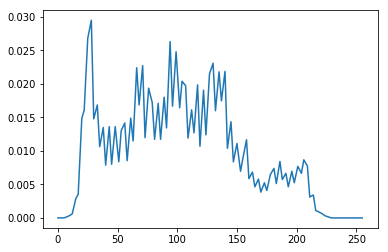

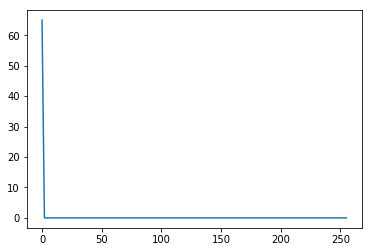

'\n# Plot histograms and gaussian curves\nfig, ax = plt.subplots()\nax.hist(image2.ravel(),255,[2,256], normed=True)\nax.plot(gmm_x, gmm_y, color="crimson", lw=4, label="GMM")\n\nax.set_ylabel("Frequency")\nax.set_xlabel("Pixel Intensity")\n\nplt.legend()\n\nplt.show()\n'

In [14]:
import plotly.plotly as py
import plotly.tools as tls
import operator
from sklearn.mixture import GaussianMixture
import numpy as np

#print(min(image2.flatten()), np.max(image2.flatten()))
histo = np.histogram(image2.flatten(), range=(0, 255), bins = 100)

#histo0 = np.concatenate(([0], histo[0]), axis=0)

prob_x_ij = histo0/np.sum(histo0)
pixel_values = histo[1].astype(int)
plt.plot(pixel_values, prob_x_ij)
plt.show()

gmm = GaussianMixture(n_components = 6)
gmm = gmm.fit(X=np.expand_dims(prob_x_ij,1))


# Evaluate GMM
gmm_x = pixel_values
gmm_y = np.exp(gmm.score_samples(gmm_x.reshape(-1,1)))
plt.plot(gmm_x,gmm_y)
plt.show()


"""
# Plot histograms and gaussian curves
fig, ax = plt.subplots()
ax.hist(image2.ravel(),255,[2,256], normed=True)
ax.plot(gmm_x, gmm_y, color="crimson", lw=4, label="GMM")

ax.set_ylabel("Frequency")
ax.set_xlabel("Pixel Intensity")

plt.legend()

plt.show()
"""

#print(sum(pixel_values*prob_x_ij))

#plt.figure()
#plt.scatter(pixel_values, prob_x_ij)

#n, bins, patches = plt.hist(image2.flatten(), range=(0,255), bins = 255, density = True,facecolor='g', alpha=0.75)



#data = np.array(prob_x_ij).reshape(-1,1)
#clf = mixture.GaussianMixture(n_components=1, covariance_type='full')
#h = clf.fit(data)

#x = np.array(pixel_values).reshape(-1,1)
#y = clf.score_samples(x)

#plt.plot(x,h)
#plt.show()


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



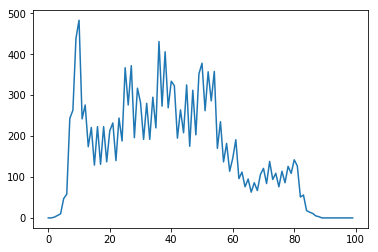

<Figure size 432x288 with 0 Axes>

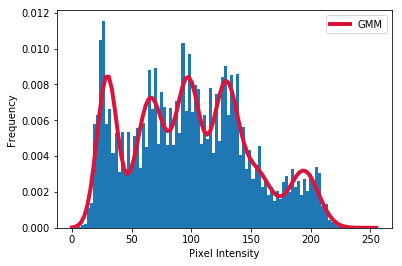

0.9999999999999999


In [52]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

hist = cv2.calcHist([image2],[0],None,[100],[0,255])
plt.plot(hist)
plt.show
plt.figure()
#hist[0] = 0     # Removes background pixels

data = image2.ravel()
#data = data[data != 0]
#data = data[data != 1]  #Removes background pixels (intensities 0 and 1)

# Fit GMM
gmm = GaussianMixture(n_components = 6)
gmm = gmm.fit(X=np.expand_dims(data,1))

# Evaluate GMM
gmm_x = np.linspace(0,255,100)
gmm_y = np.exp(gmm.score_samples(gmm_x.reshape(-1,1)))


# Plot histograms and gaussian curves
fig, ax = plt.subplots()
ax.hist(image2.ravel(), 100,[0,255], normed=True)
ax.plot(gmm_x, gmm_y, color="crimson", lw=4, label="GMM")

ax.set_ylabel("Frequency")
ax.set_xlabel("Pixel Intensity")

plt.legend()

plt.show()
gmm_y = gmm_y/sum(gmm_y)
print(sum(gmm_y))

In [25]:
print(gmm_x)

[  0.           1.00393701   2.00787402   3.01181102   4.01574803
   5.01968504   6.02362205   7.02755906   8.03149606   9.03543307
  10.03937008  11.04330709  12.04724409  13.0511811   14.05511811
  15.05905512  16.06299213  17.06692913  18.07086614  19.07480315
  20.07874016  21.08267717  22.08661417  23.09055118  24.09448819
  25.0984252   26.1023622   27.10629921  28.11023622  29.11417323
  30.11811024  31.12204724  32.12598425  33.12992126  34.13385827
  35.13779528  36.14173228  37.14566929  38.1496063   39.15354331
  40.15748031  41.16141732  42.16535433  43.16929134  44.17322835
  45.17716535  46.18110236  47.18503937  48.18897638  49.19291339
  50.19685039  51.2007874   52.20472441  53.20866142  54.21259843
  55.21653543  56.22047244  57.22440945  58.22834646  59.23228346
  60.23622047  61.24015748  62.24409449  63.2480315   64.2519685
  65.25590551  66.25984252  67.26377953  68.26771654  69.27165354
  70.27559055  71.27952756  72.28346457  73.28740157  74.29133858
  75.295275